<a href="https://colab.research.google.com/github/Synthiya123/PYTHON/blob/main/Normality_Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [3]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [30]:
heart=pd.read_csv('heart.csv')
heart.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [6]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Normality Check



1.   Distribution Plot for each variable in the dataset
2.   QQ plot for the dataset.
3.   Normality test.



# **1.DISTRIBUTION PLOTS**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


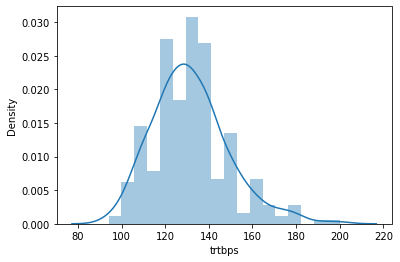

In [7]:
sns.distplot(heart['trtbps'])

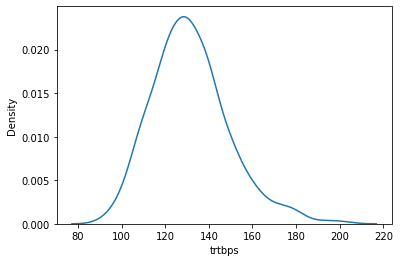

In [8]:
sns.kdeplot(heart['trtbps'])

In [9]:
heart['trtbps'].skew(axis = 0, skipna = True)

0.7137684379181465

**VARIABLE: trtbps - Blod Pressure Level.**

Blood Pressure level is observed to be normally distributed and right skewed.

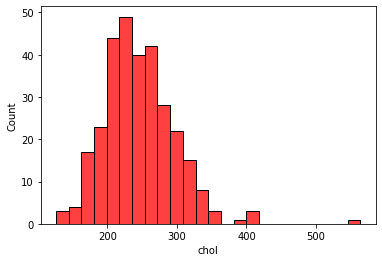

In [10]:
#histplot

sns.histplot(data=heart,x='chol',color='red')


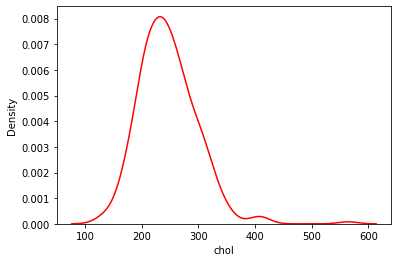

In [12]:
sns.kdeplot(data=heart,x='chol',color='r')

In [13]:
heart['chol'].skew(axis = 0, skipna = True)

1.1434008206693387

**VARIABLE 2: Cholestrol**

chlosterol is also normal distributed with the right skewnes.

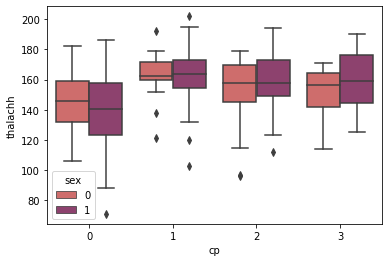

In [25]:
# BOXPLOT

sns.boxplot(data=heart,y='thalachh',x='cp',hue='sex',palette='flare')

BOXPLOT To visualize distributions of multiple variables at the same time.

Intrepetation

when the boxplot is displayed in the bell curve,            
The Cp(0) and thalachh has their 50% of values lies between 135-160 for Female and 125- 158 for Male. Thus the relationship between Boxplot and normal curve.



# **2. QQ PLOT**

In [31]:
#QQ PLOT
from scipy.stats import norm

In [32]:
heart=norm.rvs(size=300)

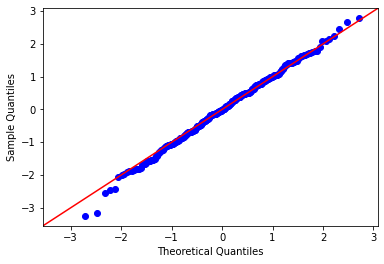

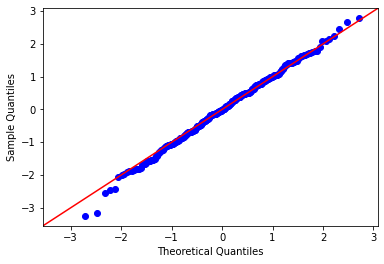

In [34]:
HA=sm.qqplot(heart, line='45')
HA

**QQ PLOT**

QQ plot is used to check the normality of the datase.

The quantiles of our variable must be perfectly in line with the “theoretical” normal quantiles: a straight line on the QQ Plot tells the data is a normal distribution.
 
 As most of the points lies on the straight line and few points below the line this signifies that the dataset(heart) is normally distributed.  

# 3. **NORMALITY TEST  - KOLMOGROV SMIRNOV**

The Test Statistic of the KS Test is the Kolmogorov Smirnov Statistic

In [35]:
from scipy.stats import kstest, norm

In [36]:
heart=norm.rvs(size=300)

In [38]:
ks_statistic, p_value = kstest(heart, 'norm')
print(ks_statistic, p_value)

0.061639626694465155 0.19616306933035121


**INTERPRETATION**

The KS statistic and  P-value detremines normality of  the dataset.


*   **KS statistic** should be Zero
*   If  **P-value** should be greater than 0.05 then it follws the normal distribution.

As the dataset(heart) has ks statistic =0.061 and p-value = 0.19, it follows the normal distribution. 

